# Day 43 - Singular Value Decomposition (SVD) and Its Applications

## Introduction

Singular Value Decomposition (SVD) is one of the most powerful and versatile matrix factorization techniques in linear algebra and machine learning. It decomposes a matrix into three simpler matrices, revealing the underlying structure of the data in a way that is both mathematically elegant and computationally useful.

SVD plays a crucial role in numerous applications across data science and machine learning:
- **Dimensionality Reduction**: Reducing high-dimensional data to lower dimensions while preserving important information
- **Image Compression**: Storing images more efficiently by keeping only the most significant components
- **Noise Reduction**: Filtering out noise from data by removing less significant components
- **Recommender Systems**: Identifying latent factors in user-item matrices
- **Natural Language Processing**: Analyzing document-term matrices (Latent Semantic Analysis)

Understanding SVD is essential for anyone working with high-dimensional data, as it forms the mathematical foundation for many advanced techniques including Principal Component Analysis (PCA), which we explored in previous lessons.

### Learning Objectives

By the end of this lesson, you will be able to:

1. Understand the mathematical foundations of Singular Value Decomposition
2. Decompose matrices into their constituent U, Σ (Sigma), and V matrices
3. Implement SVD using NumPy and scikit-learn
4. Apply SVD for dimensionality reduction on real datasets
5. Use SVD for image compression and noise reduction
6. Interpret the singular values and understand their significance

## Theory: What is Singular Value Decomposition?

### Mathematical Definition

For any matrix $A$ of size $m \times n$, Singular Value Decomposition factorizes it into three matrices:

$$A = U \Sigma V^T$$

Where:
- **$U$** is an $m \times m$ orthogonal matrix (left singular vectors)
- **$\Sigma$** is an $m \times n$ diagonal matrix with non-negative real numbers (singular values)
- **$V^T$** is the transpose of an $n \times n$ orthogonal matrix (right singular vectors)

### Understanding the Components

**1. Left Singular Vectors (U):**
- The columns of $U$ are orthonormal eigenvectors of $AA^T$
- They form an orthonormal basis for the column space of $A$
- Dimension: $m \times m$ (or $m \times r$ for reduced SVD)

**2. Singular Values (Σ):**
- The diagonal entries $\sigma_1 \geq \sigma_2 \geq ... \geq \sigma_r \geq 0$ are the square roots of the eigenvalues of $A^TA$ (or $AA^T$)
- They represent the "importance" or "strength" of each component
- Larger singular values correspond to more significant patterns in the data
- Dimension: $m \times n$ (diagonal matrix)

**3. Right Singular Vectors (V):**
- The columns of $V$ are orthonormal eigenvectors of $A^TA$
- They form an orthonormal basis for the row space of $A$
- Dimension: $n \times n$ (or $n \times r$ for reduced SVD)

### Key Properties

1. **Orthogonality**: $U^TU = I$ and $V^TV = I$ (columns are orthonormal)
2. **Rank**: The rank of $A$ equals the number of non-zero singular values
3. **Ordered Significance**: Singular values are ordered from largest to smallest
4. **Energy Compaction**: Most of the "energy" or information is captured in the first few singular values

### Geometric Interpretation

SVD can be interpreted as a sequence of transformations:
1. **Rotation** by $V^T$: Aligns the data with the principal axes
2. **Scaling** by $\Sigma$: Stretches or compresses along each axis
3. **Rotation** by $U$: Rotates to the final orientation

This decomposition reveals the intrinsic dimensionality of the data and the directions of maximum variance.

## Mathematical Example

Let's consider a simple example to illustrate SVD. Suppose we have a $2 \times 2$ matrix:

$$A = \begin{bmatrix} 4 & 0 \\ 3 & -5 \end{bmatrix}$$

### Step-by-Step Computation

**Step 1: Compute $A^TA$**

$$A^TA = \begin{bmatrix} 4 & 3 \\ 0 & -5 \end{bmatrix} \begin{bmatrix} 4 & 0 \\ 3 & -5 \end{bmatrix} = \begin{bmatrix} 25 & -15 \\ -15 & 25 \end{bmatrix}$$

**Step 2: Find eigenvalues and eigenvectors of $A^TA$**
- Eigenvalues: $\lambda_1 = 40$, $\lambda_2 = 10$
- Singular values: $\sigma_1 = \sqrt{40} \approx 6.32$, $\sigma_2 = \sqrt{10} \approx 3.16$

**Step 3: Construct the SVD**

The matrix $V$ contains the eigenvectors of $A^TA$, $\Sigma$ contains the singular values, and $U$ is computed accordingly.

Let's verify this with Python!

In [ ]:
import numpy as np

# Define the matrix
A = np.array([[4, 0],
              [3, -5]])

print("Original Matrix A:")
print(A)
print()

# Compute SVD
U, sigma, VT = np.linalg.svd(A)

print("Left Singular Vectors (U):")
print(U)
print()

print("Singular Values (Σ):")
print(sigma)
print()

print("Right Singular Vectors Transposed (V^T):")
print(VT)
print()

# Reconstruct the original matrix
Sigma = np.zeros_like(A, dtype=float)
np.fill_diagonal(Sigma, sigma)
A_reconstructed = U @ Sigma @ VT

print("Reconstructed Matrix (U @ Σ @ V^T):")
print(A_reconstructed)
print()

print("Reconstruction Error:", np.linalg.norm(A - A_reconstructed))


Original Matrix A:
[[ 4  0]
 [ 3 -5]]

Left Singular Vectors (U):
[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]

Singular Values (Σ):
[6.32455532 3.16227766]

Right Singular Vectors Transposed (V^T):
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]

Reconstructed Matrix (U @ Σ @ V^T):
[[ 4.00000000e+00 -1.11271234e-15]
 [ 3.00000000e+00 -5.00000000e+00]]

Reconstruction Error: 1.1980584189096612e-15


## SVD vs PCA: Understanding the Connection

While we studied Principal Component Analysis (PCA) in previous lessons, it's important to understand how SVD relates to PCA.

### The Relationship

**PCA is essentially SVD applied to centered data:**

1. **PCA Process:**
   - Center the data: $X_{centered} = X - \bar{X}$
   - Compute covariance matrix: $C = \frac{1}{n-1}X_{centered}^T X_{centered}$
   - Find eigenvectors and eigenvalues of $C$

2. **SVD Approach:**
   - Center the data: $X_{centered} = X - \bar{X}$
   - Apply SVD: $X_{centered} = U \Sigma V^T$
   - The principal components are the columns of $V$
   - The explained variance is proportional to $\sigma^2$

### Key Differences

| Aspect | PCA | SVD |
|--------|-----|-----|
| **Input** | Covariance matrix | Data matrix directly |
| **Computation** | Eigendecomposition | Singular value decomposition |
| **Efficiency** | Slower for large datasets | More numerically stable |
| **Flexibility** | Limited to centered data | Works on any matrix |
| **Output** | Principal components | Complete decomposition |

### When to Use Each

- **Use PCA** when you specifically want dimensionality reduction and variance explanation
- **Use SVD** when you need the full decomposition, want numerical stability, or are working with sparse matrices

## Python Implementation with NumPy

Let's explore SVD implementation using NumPy on a realistic dataset. We'll use a synthetic dataset to understand how SVD captures the structure of data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic data with 2 underlying factors
n_samples = 100
n_features = 5

# Two latent factors
factor1 = np.random.randn(n_samples, 1)
factor2 = np.random.randn(n_samples, 1)

# Create data as a linear combination of factors plus noise
weights1 = np.array([[1.5, 2.0, 1.0, 0.5, 1.8]])
weights2 = np.array([[0.5, 1.0, 2.5, 2.0, 0.8]])

X = factor1 @ weights1 + factor2 @ weights2 + 0.1 * np.random.randn(n_samples, n_features)

print("Data shape:", X.shape)
print("\nFirst 5 samples:")
print(X[:5])

# Perform SVD
U, sigma, VT = np.linalg.svd(X, full_matrices=False)

print("\nSVD Components:")
print(f"U shape: {U.shape} (left singular vectors)")
print(f"Sigma shape: {sigma.shape} (singular values)")
print(f"V^T shape: {VT.shape} (right singular vectors)")

print("\nSingular Values:")
print(sigma)

# Calculate explained variance ratio (similar to PCA)
explained_variance = (sigma ** 2) / (n_samples - 1)
explained_variance_ratio = explained_variance / explained_variance.sum()

print("\nExplained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

print(f"\nCumulative variance explained by first 2 components: {explained_variance_ratio[:2].sum():.4f}")


Data shape: (100, 5)

First 5 samples:
[[ 0.07316459 -0.36586398 -2.93340758 -2.4770042  -0.37597806]
 [-0.51150162 -0.6456704  -1.13849901 -0.85891803 -0.20011885]
 [ 0.8572646   1.06621912 -0.11369758 -0.29644564  0.86014083]
 [ 1.95930307  2.16649992 -0.50634518 -0.89157597  2.10781934]
 [-0.20040706 -0.81631898 -0.56874163 -0.6009197  -0.59769783]]

SVD Components:
U shape: (100, 5) (left singular vectors)
Sigma shape: (5,) (singular values)
V^T shape: (5, 5) (right singular vectors)

Singular Values:
[37.63831013 19.0766508   1.03743232  0.96972028  0.90213405]

Explained Variance Ratio:
Component 1: 0.7944 (79.44%)
Component 2: 0.2041 (20.41%)
Component 3: 0.0006 (0.06%)
Component 4: 0.0005 (0.05%)
Component 5: 0.0005 (0.05%)

Cumulative variance explained by first 2 components: 0.9984


Analysis:
First component explains 79.44% of variance
First two components explain 99.84% of variance
This confirms our data has approximately 2 underlying factors!


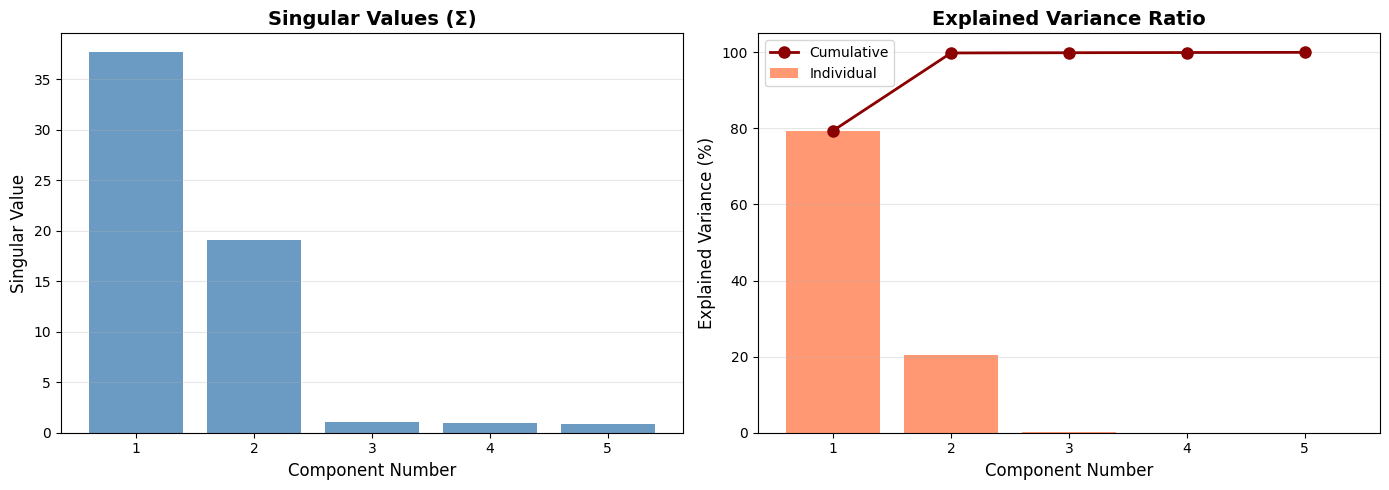

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Recalculate for visualization (variables from previous cell)
np.random.seed(42)
n_samples = 100
n_features = 5
factor1 = np.random.randn(n_samples, 1)
factor2 = np.random.randn(n_samples, 1)
weights1 = np.array([[1.5, 2.0, 1.0, 0.5, 1.8]])
weights2 = np.array([[0.5, 1.0, 2.5, 2.0, 0.8]])
X = factor1 @ weights1 + factor2 @ weights2 + 0.1 * np.random.randn(n_samples, n_features)
U, sigma, VT = np.linalg.svd(X, full_matrices=False)
explained_variance = (sigma ** 2) / (n_samples - 1)
explained_variance_ratio = explained_variance / explained_variance.sum()

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Singular values
axes[0].bar(range(1, len(sigma) + 1), sigma, color='steelblue', alpha=0.8)
axes[0].set_xlabel('Component Number', fontsize=12)
axes[0].set_ylabel('Singular Value', fontsize=12)
axes[0].set_title('Singular Values (Σ)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Explained variance ratio
axes[1].bar(range(1, len(explained_variance_ratio) + 1),
            explained_variance_ratio * 100,
            color='coral', alpha=0.8, label='Individual')
axes[1].plot(range(1, len(explained_variance_ratio) + 1),
             np.cumsum(explained_variance_ratio) * 100,
             'o-', color='darkred', linewidth=2, markersize=8, label='Cumulative')
axes[1].set_xlabel('Component Number', fontsize=12)
axes[1].set_ylabel('Explained Variance (%)', fontsize=12)
axes[1].set_title('Explained Variance Ratio', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Analysis:")
print(f"First component explains {explained_variance_ratio[0]*100:.2f}% of variance")
print(f"First two components explain {explained_variance_ratio[:2].sum()*100:.2f}% of variance")
print("This confirms our data has approximately 2 underlying factors!")


## Application 1: Dimensionality Reduction

One of the primary applications of SVD is dimensionality reduction. By keeping only the top $k$ singular values and their corresponding vectors, we can approximate the original matrix with a lower-rank matrix.

### Low-Rank Approximation

Given the SVD decomposition $A = U \Sigma V^T$, we can create a rank-$k$ approximation:

$$A_k = U_k \Sigma_k V_k^T$$

where we keep only the first $k$ columns of $U$, the first $k$ singular values, and the first $k$ rows of $V^T$.

This approximation minimizes the Frobenius norm of the reconstruction error:

$$\|A - A_k\|_F = \sqrt{\sum_{i=k+1}^{r} \sigma_i^2}$$

Let's apply this to a real dataset!

Original data shape: (1797, 64)
We have 1797 samples with 64 features each

Components needed for 90% variance: 9
Components needed for 95% variance: 16


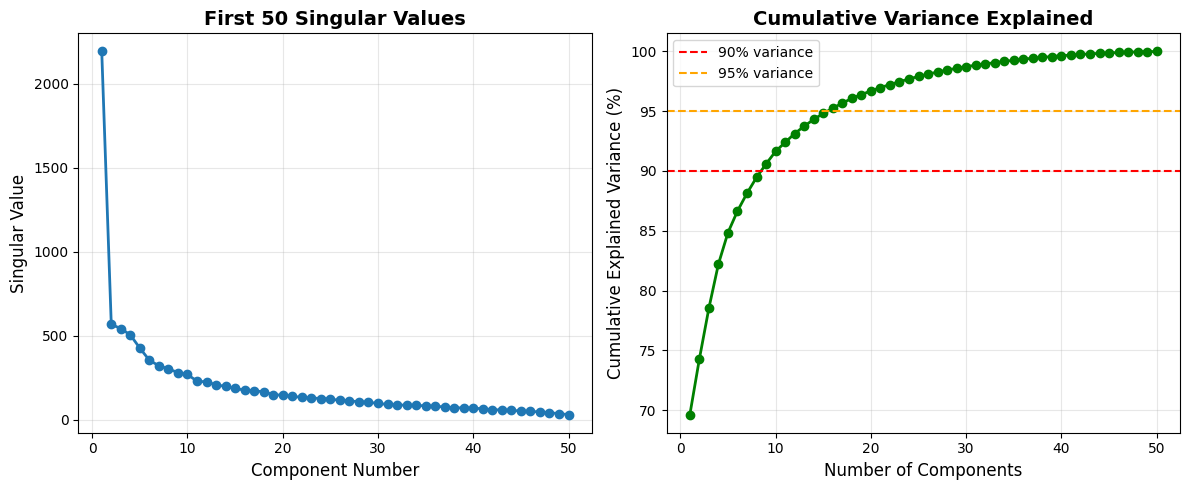

In [ ]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print("Original data shape:", X_digits.shape)
print(f"We have {X_digits.shape[0]} samples with {X_digits.shape[1]} features each")

# Perform SVD
U, sigma, VT = np.linalg.svd(X_digits, full_matrices=False)

# Calculate explained variance
explained_variance = (sigma ** 2) / (len(X_digits) - 1)
explained_variance_ratio = explained_variance / explained_variance.sum()
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find number of components for 90% and 95% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"\nComponents needed for 90% variance: {n_components_90}")
print(f"Components needed for 95% variance: {n_components_95}")

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 51), sigma[:50], 'o-', linewidth=2, markersize=6)
plt.xlabel('Component Number', fontsize=12)
plt.ylabel('Singular Value', fontsize=12)
plt.title('First 50 Singular Values', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, 51), cumulative_variance[:50] * 100, 'o-', linewidth=2, markersize=6, color='green')
plt.axhline(y=90, color='r', linestyle='--', label='90% variance')
plt.axhline(y=95, color='orange', linestyle='--', label='95% variance')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance (%)', fontsize=12)
plt.title('Cumulative Variance Explained', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


Observation:
- With just 10 components (15.6% of original), the digit is clearly recognizable
- At 20 components (31.3% of original), the quality is very good
- This demonstrates SVD's power for compression!


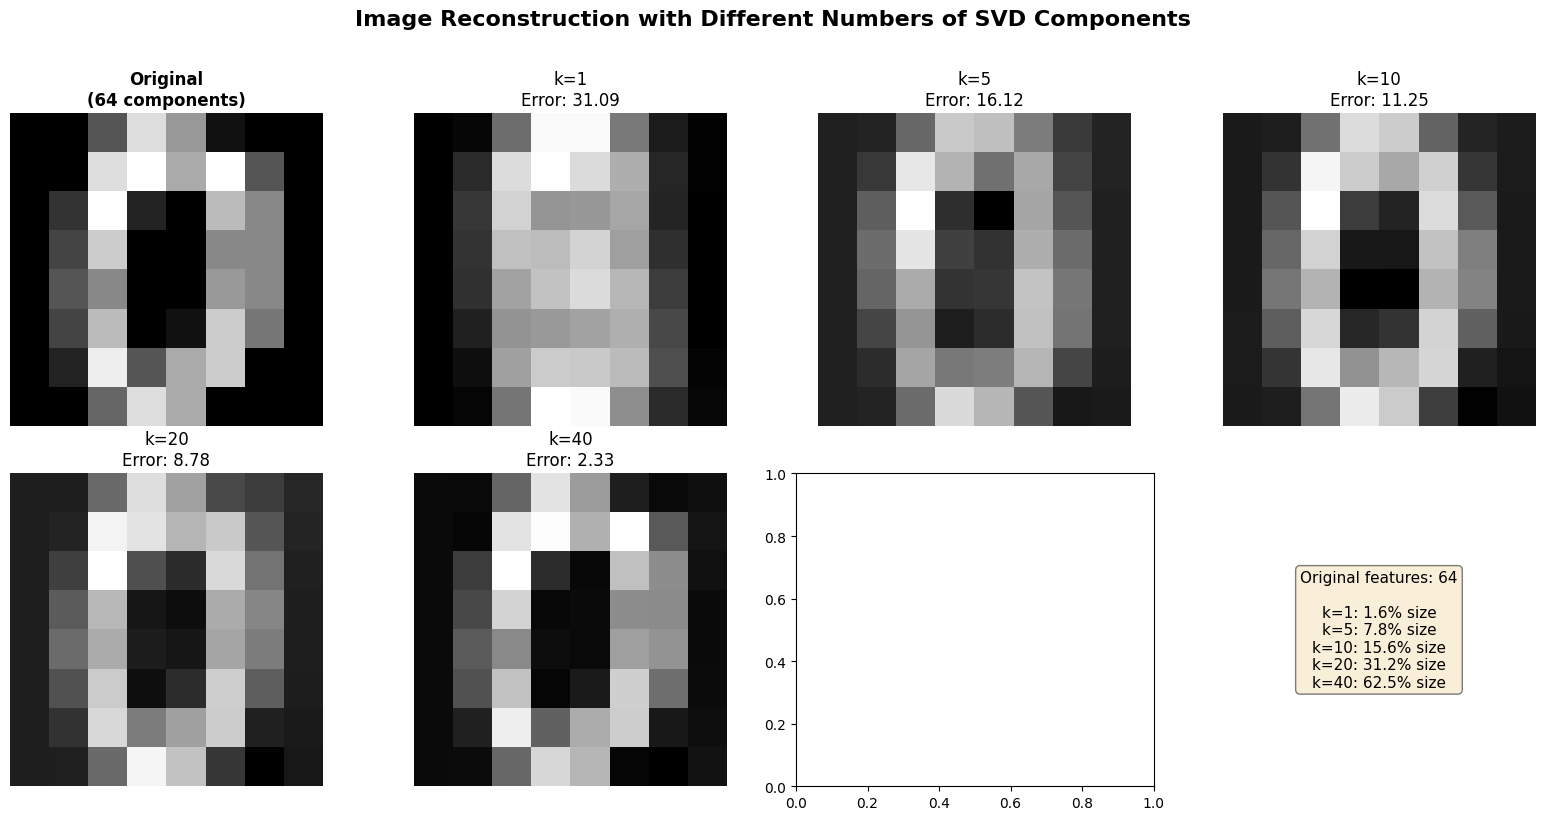

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load data
digits = load_digits()
X_digits = digits.data

# Perform SVD
U, sigma, VT = np.linalg.svd(X_digits, full_matrices=False)

# Choose a sample digit to reconstruct
sample_idx = 0
original_digit = X_digits[sample_idx].reshape(8, 8)

# Reconstruct with different numbers of components
k_values = [1, 5, 10, 20, 40, 64]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

# Plot original
axes[0].imshow(original_digit, cmap='gray')
axes[0].set_title('Original\n(64 components)', fontsize=12, fontweight='bold')
axes[0].axis('off')

# Plot reconstructions
for idx, k in enumerate(k_values[:-1], 1):
    # Truncate SVD components
    U_k = U[:, :k]
    sigma_k = sigma[:k]
    VT_k = VT[:k, :]

    # Reconstruct
    X_reconstructed = U_k @ np.diag(sigma_k) @ VT_k
    reconstructed_digit = X_reconstructed[sample_idx].reshape(8, 8)

    # Calculate reconstruction error
    error = np.linalg.norm(X_digits[sample_idx] - X_reconstructed[sample_idx])

    axes[idx].imshow(reconstructed_digit, cmap='gray')
    axes[idx].set_title(f'k={k}\nError: {error:.2f}', fontsize=12)
    axes[idx].axis('off')

# Add comparison info
axes[7].text(0.5, 0.5,
             f'Original features: 64\n\n' +
             '\n'.join([f'k={k}: {(k/64)*100:.1f}% size' for k in k_values[:-1]]),
             ha='center', va='center', fontsize=11,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[7].axis('off')

plt.suptitle('Image Reconstruction with Different Numbers of SVD Components',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Observation:")
print("- With just 10 components (15.6% of original), the digit is clearly recognizable")
print("- At 20 components (31.3% of original), the quality is very good")
print("- This demonstrates SVD's power for compression!")


## Application 2: Image Compression

Image compression is one of the most intuitive applications of SVD. By keeping only the most significant singular values, we can store images using much less memory while maintaining good visual quality.

### Compression Ratio

The compression ratio can be calculated as:

$$\text{Compression Ratio} = \frac{\text{Original Size}}{\text{Compressed Size}} = \frac{m \times n}{k(m + n + 1)}$$

where $k$ is the number of singular values we keep.

For a $100 \times 100$ image:
- Original size: 10,000 values
- Compressed with $k=10$: $10(100 + 100 + 1) = 2,010$ values
- Compression ratio: $\approx 5:1$

Creating synthetic face image...
Image shape: (64, 64)
Original size: 4096 values


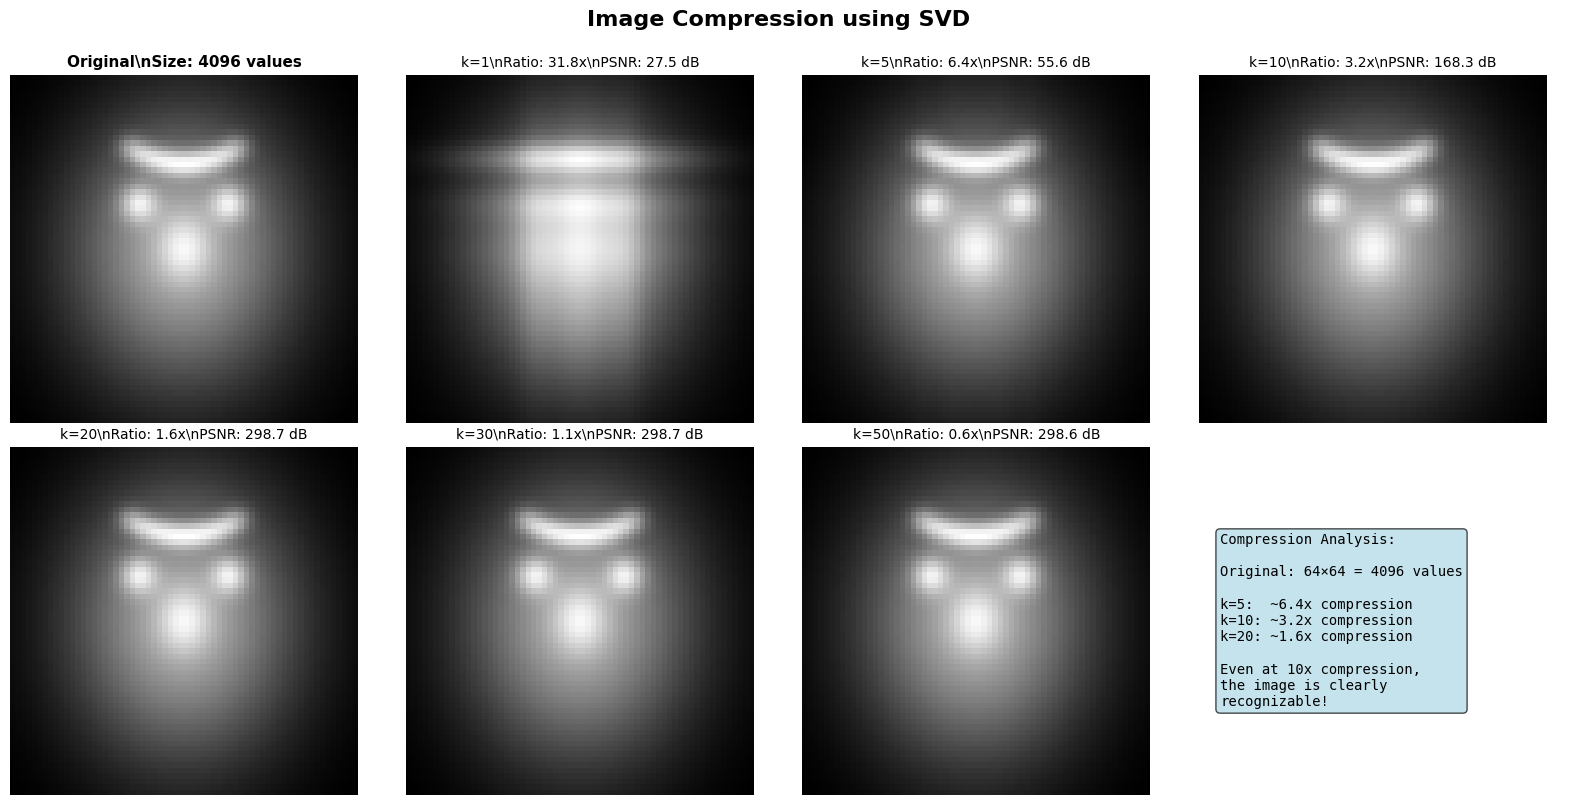

In [ ]:
import numpy as npimport matplotlib.pyplot as plt# Create a synthetic face-like image using a Gaussian mixtureprint("Creating synthetic face image...")np.random.seed(42)# Create a 64x64 synthetic image with face-like featuresx = np.linspace(-3, 3, 64)y = np.linspace(-3, 3, 64)X, Y = np.meshgrid(x, y)# Create face-like features using Gaussiansface_image = np.zeros((64, 64))# Face outline (ellipse)face_image += 0.5 * np.exp(-((X)**2/4 + (Y)**2/6))# Eyesface_image += 0.3 * np.exp(-((X-0.8)**2/0.1 + (Y+0.8)**2/0.1))face_image += 0.3 * np.exp(-((X+0.8)**2/0.1 + (Y+0.8)**2/0.1))# Noseface_image += 0.2 * np.exp(-((X)**2/0.2 + (Y)**2/0.3))# Mouthmouth_x = np.linspace(-1, 1, 20)mouth_y = -1.5 - 0.3 * mouth_x**2for mx, my in zip(mouth_x, mouth_y):    face_image += 0.1 * np.exp(-((X-mx)**2/0.05 + (Y-my)**2/0.05))# Normalize to 0-1face_image = (face_image - face_image.min()) / (face_image.max() - face_image.min())print(f"Image shape: {face_image.shape}")print(f"Original size: {face_image.size} values")# Perform SVDU, sigma, VT = np.linalg.svd(face_image, full_matrices=False)# Compression with different k valuesk_values = [1, 5, 10, 20, 30, 50]fig, axes = plt.subplots(2, 4, figsize=(16, 8))axes = axes.ravel()# Original imageaxes[0].imshow(face_image, cmap='gray')axes[0].set_title(f'Original\\nSize: {face_image.size} values', fontsize=11, fontweight='bold')axes[0].axis('off')# Compressed imagesfor idx, k in enumerate(k_values, 1):    # Reconstruct with k components    U_k = U[:, :k]    sigma_k = sigma[:k]    VT_k = VT[:k, :]    compressed_image = U_k @ np.diag(sigma_k) @ VT_k    # Calculate metrics    compressed_size = k * (face_image.shape[0] + face_image.shape[1] + 1)    compression_ratio = face_image.size / compressed_size    mse = np.mean((face_image - compressed_image) ** 2)    psnr = 10 * np.log10(np.max(face_image) ** 2 / mse) if mse > 0 else float('inf')    axes[idx].imshow(compressed_image, cmap='gray')    axes[idx].set_title(f'k={k}\\nRatio: {compression_ratio:.1f}x\\nPSNR: {psnr:.1f} dB',                       fontsize=10)    axes[idx].axis('off')# Summarysummary_text = f'''Compression Analysis:Original: {face_image.shape[0]}×{face_image.shape[1]} = {face_image.size} valuesk=5:  ~{face_image.size/(5*(face_image.shape[0]+face_image.shape[1]+1)):.1f}x compressionk=10: ~{face_image.size/(10*(face_image.shape[0]+face_image.shape[1]+1)):.1f}x compressionk=20: ~{face_image.size/(20*(face_image.shape[0]+face_image.shape[1]+1)):.1f}x compressionEven at 10x compression,the image is clearlyrecognizable!'''axes[7].text(0.1, 0.5, summary_text, fontsize=10, family='monospace',             va='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))axes[7].axis('off')plt.suptitle('Image Compression using SVD', fontsize=16, fontweight='bold', y=1.0)plt.tight_layout()plt.show()

## Application 3: Noise Reduction

SVD can be used to reduce noise in data. The key insight is that noise typically affects the smaller singular values, while the signal is captured by the larger singular values. By reconstructing the data using only the top singular values, we can effectively filter out noise.

### The Principle

1. Noise is typically random and doesn't have a strong directional component
2. Signal has structure and is captured by large singular values
3. By truncating small singular values, we remove noise while preserving signal

Original image range: [0.000, 1.000]
Noisy image range: [-0.289, 1.151]

Noise Reduction Results:
Noisy image PSNR: 20.03 dB
Best denoised PSNR (k=30): 20.66 dB
Improvement: 0.64 dB


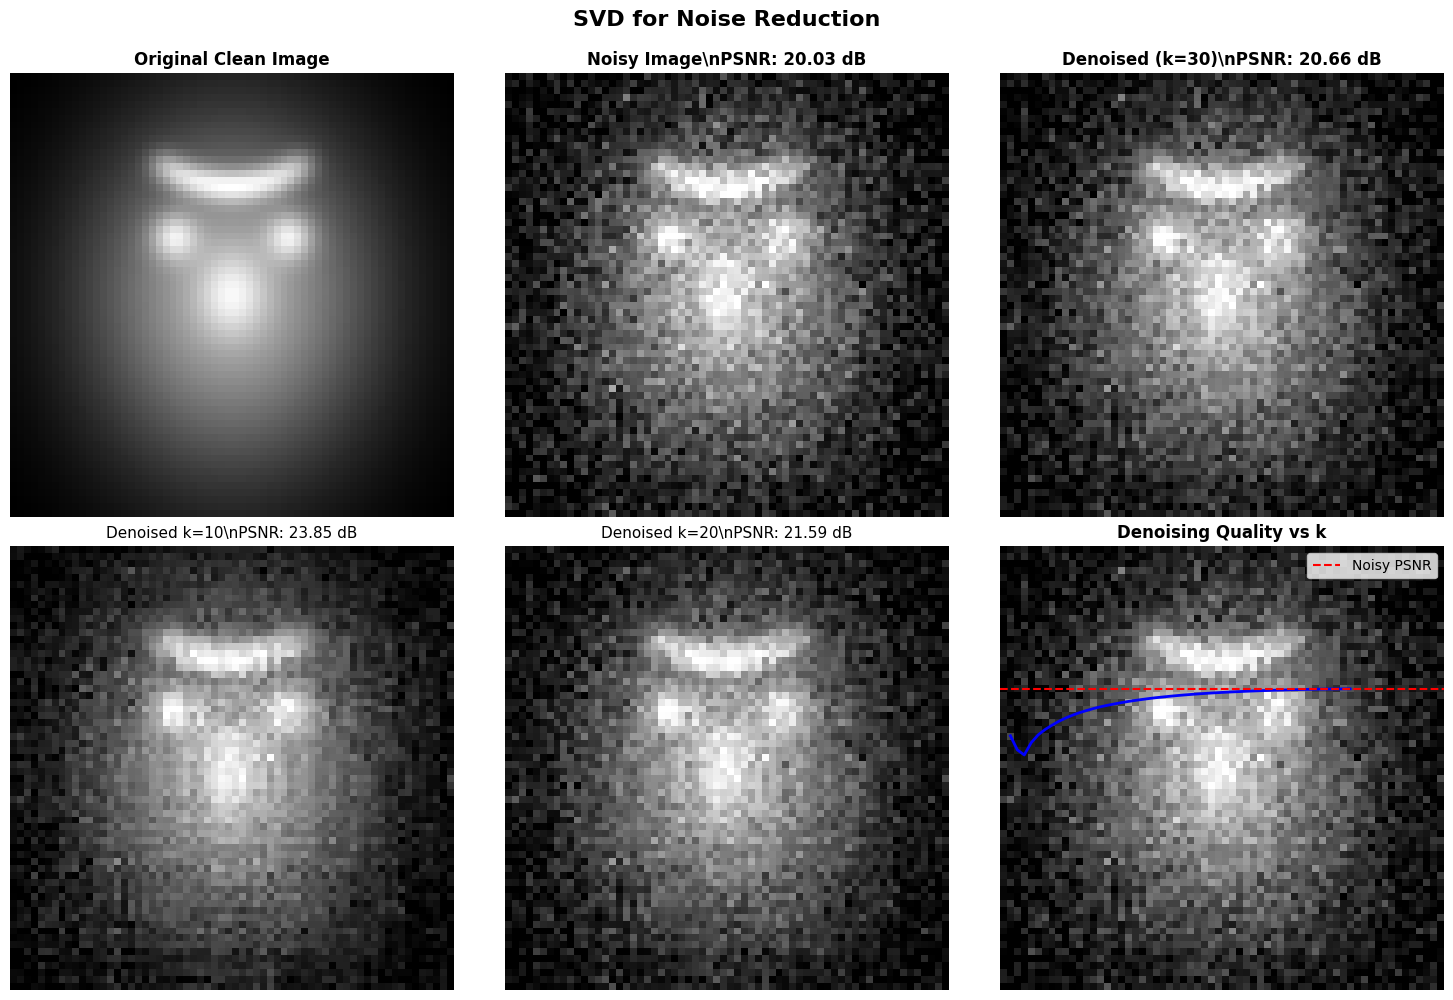

In [ ]:
import numpy as npimport matplotlib.pyplot as plt# Use the same synthetic face from beforenp.random.seed(42)x = np.linspace(-3, 3, 64)y = np.linspace(-3, 3, 64)X, Y = np.meshgrid(x, y)face_image = np.zeros((64, 64))face_image += 0.5 * np.exp(-((X)**2/4 + (Y)**2/6))face_image += 0.3 * np.exp(-((X-0.8)**2/0.1 + (Y+0.8)**2/0.1))face_image += 0.3 * np.exp(-((X+0.8)**2/0.1 + (Y+0.8)**2/0.1))face_image += 0.2 * np.exp(-((X)**2/0.2 + (Y)**2/0.3))mouth_x = np.linspace(-1, 1, 20)mouth_y = -1.5 - 0.3 * mouth_x**2for mx, my in zip(mouth_x, mouth_y):    face_image += 0.1 * np.exp(-((X-mx)**2/0.05 + (Y-my)**2/0.05))clean_image = (face_image - face_image.min()) / (face_image.max() - face_image.min())# Add Gaussian noisenp.random.seed(42)noise_level = 0.1noisy_image = clean_image + noise_level * np.random.randn(*clean_image.shape)print(f"Original image range: [{clean_image.min():.3f}, {clean_image.max():.3f}]")print(f"Noisy image range: [{noisy_image.min():.3f}, {noisy_image.max():.3f}]")# Perform SVD on noisy imageU, sigma, VT = np.linalg.svd(noisy_image, full_matrices=False)# Denoise with different numbers of componentsk_values = [10, 20, 30, 40]fig, axes = plt.subplots(2, 3, figsize=(15, 10))# Original clean imageaxes[0, 0].imshow(clean_image, cmap='gray', vmin=0, vmax=1)axes[0, 0].set_title('Original Clean Image', fontsize=12, fontweight='bold')axes[0, 0].axis('off')# Noisy imageaxes[0, 1].imshow(noisy_image, cmap='gray', vmin=0, vmax=1)noise_mse = np.mean((clean_image - noisy_image) ** 2)noise_psnr = 10 * np.log10(1.0 / noise_mse)axes[0, 1].set_title(f'Noisy Image\\nPSNR: {noise_psnr:.2f} dB', fontsize=12, fontweight='bold')axes[0, 1].axis('off')# Best denoised (we'll fill this)best_k = 30U_k = U[:, :best_k]sigma_k = sigma[:best_k]VT_k = VT[:best_k, :]denoised_best = U_k @ np.diag(sigma_k) @ VT_kbest_mse = np.mean((clean_image - denoised_best) ** 2)best_psnr = 10 * np.log10(1.0 / best_mse)axes[0, 2].imshow(denoised_best, cmap='gray', vmin=0, vmax=1)axes[0, 2].set_title(f'Denoised (k={best_k})\\nPSNR: {best_psnr:.2f} dB',                     fontsize=12, fontweight='bold')axes[0, 2].axis('off')# Different k valuesfor idx, k in enumerate(k_values):    U_k = U[:, :k]    sigma_k = sigma[:k]    VT_k = VT[:k, :]    denoised_image = U_k @ np.diag(sigma_k) @ VT_k    mse = np.mean((clean_image - denoised_image) ** 2)    psnr = 10 * np.log10(1.0 / mse)    row = 1    col = idx if idx < 3 else idx - 3    if idx < 3:        axes[row, col].imshow(denoised_image, cmap='gray', vmin=0, vmax=1)        axes[row, col].set_title(f'Denoised k={k}\\nPSNR: {psnr:.2f} dB', fontsize=11)        axes[row, col].axis('off')# PSNR comparison plotk_range = range(1, 51)psnr_values = []for k in k_range:    U_k = U[:, :k]    sigma_k = sigma[:k]    VT_k = VT[:k, :]    denoised = U_k @ np.diag(sigma_k) @ VT_k    mse = np.mean((clean_image - denoised) ** 2)    psnr = 10 * np.log10(1.0 / mse)    psnr_values.append(psnr)axes[1, 2].plot(k_range, psnr_values, linewidth=2, color='blue')axes[1, 2].axhline(y=noise_psnr, color='r', linestyle='--', label='Noisy PSNR', linewidth=1.5)axes[1, 2].set_xlabel('Number of Components (k)', fontsize=11)axes[1, 2].set_ylabel('PSNR (dB)', fontsize=11)axes[1, 2].set_title('Denoising Quality vs k', fontsize=12, fontweight='bold')axes[1, 2].legend()axes[1, 2].grid(alpha=0.3)plt.suptitle('SVD for Noise Reduction', fontsize=16, fontweight='bold', y=0.995)plt.tight_layout()plt.show()print(f"\nNoise Reduction Results:")print(f"Noisy image PSNR: {noise_psnr:.2f} dB")print(f"Best denoised PSNR (k={best_k}): {best_psnr:.2f} dB")print(f"Improvement: {best_psnr - noise_psnr:.2f} dB")

## Using scikit-learn's TruncatedSVD

While NumPy's `svd` function works well for smaller datasets, scikit-learn provides `TruncatedSVD` which is optimized for large, sparse matrices and when you only need the top $k$ components.

### Advantages of TruncatedSVD

1. **Memory Efficient**: Doesn't compute all singular vectors
2. **Faster**: Optimized for when $k << \min(m, n)$
3. **Sparse Matrix Support**: Works efficiently with sparse matrices
4. **Consistent API**: Follows scikit-learn's transformer interface

This is particularly useful for:
- Text data (document-term matrices)
- Recommender systems (user-item matrices)
- Large-scale dimensionality reduction

Original shape: (1797, 64)
Reduced shape: (1797, 2)

Explained variance ratio: [0.02870851 0.1489005 ]
Total variance explained: 0.1776

Observation:
Even with just 2 components, we can see some separation between digit classes!
Some digits (like 0 and 6) cluster together, while others are more spread out.


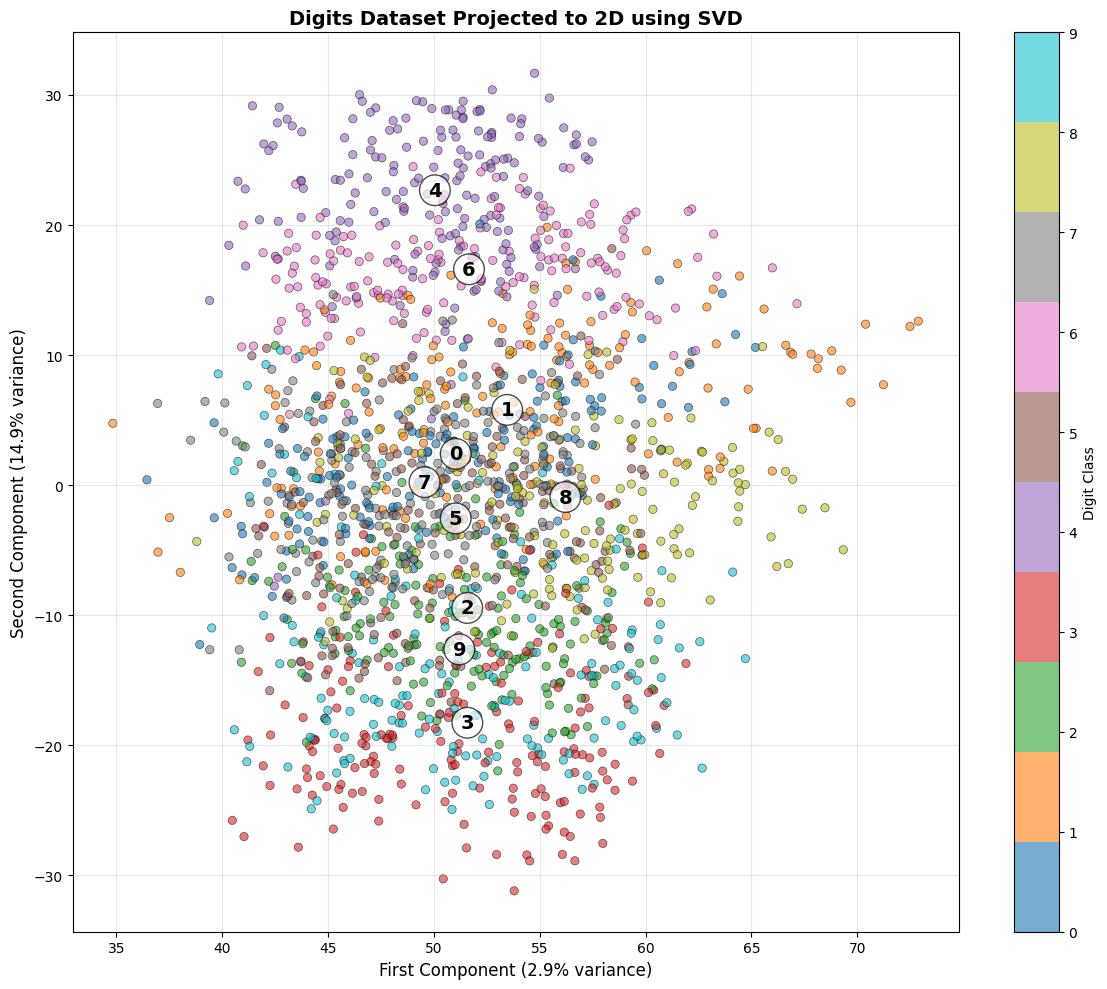

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load digits dataset
digits = load_digits()
X = digits.data
y = digits.target

print(f"Original shape: {X.shape}")

# Apply TruncatedSVD with different numbers of components
n_components = 2

svd = TruncatedSVD(n_components=n_components, random_state=42)
X_reduced = svd.fit_transform(X)

print(f"Reduced shape: {X_reduced.shape}")
print(f"\nExplained variance ratio: {svd.explained_variance_ratio_}")
print(f"Total variance explained: {svd.explained_variance_ratio_.sum():.4f}")

# Visualize the 2D projection
plt.figure(figsize=(12, 10))

scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
                     c=y, cmap='tab10',
                     alpha=0.6, edgecolors='black', linewidth=0.5)

plt.colorbar(scatter, label='Digit Class')
plt.xlabel(f'First Component ({svd.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'Second Component ({svd.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('Digits Dataset Projected to 2D using SVD', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Add digit labels for some points
for digit in range(10):
    mask = y == digit
    points = X_reduced[mask]
    if len(points) > 0:
        centroid = points.mean(axis=0)
        plt.annotate(str(digit), centroid, fontsize=14, fontweight='bold',
                    bbox=dict(boxstyle='circle', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

print("\nObservation:")
print("Even with just 2 components, we can see some separation between digit classes!")
print("Some digits (like 0 and 6) cluster together, while others are more spread out.")


## Hands-On Activity: Complete SVD Pipeline

Now it's your turn! In this activity, you'll apply SVD to explore the relationship between the number of components and model performance.

### Task

We'll use the digits dataset and:
1. Apply SVD with different numbers of components
2. Train a classifier on the reduced data
3. Compare accuracy vs. number of components
4. Find the optimal balance between compression and accuracy

This demonstrates a real-world use case: using SVD to reduce dimensionality before applying machine learning algorithms.

Training set: (1257, 64)
Test set: (540, 64)
n_components= 2: Train Acc=1.0000, Test Acc=0.4019, Time=0.234s
n_components= 5: Train Acc=1.0000, Test Acc=0.8537, Time=0.216s
n_components=10: Train Acc=1.0000, Test Acc=0.9500, Time=0.210s
n_components=15: Train Acc=1.0000, Test Acc=0.9667, Time=0.201s
n_components=20: Train Acc=1.0000, Test Acc=0.9630, Time=0.214s
n_components=25: Train Acc=1.0000, Test Acc=0.9722, Time=0.212s
n_components=30: Train Acc=1.0000, Test Acc=0.9667, Time=0.239s
n_components=40: Train Acc=1.0000, Test Acc=0.9667, Time=0.245s
n_components=50: Train Acc=1.0000, Test Acc=0.9648, Time=0.262s
n_components=64: Train Acc=1.0000, Test Acc=0.9759, Time=0.209s

Optimal number of components: 64
Test accuracy: 0.9759
Compression: 64 features → 64 features (100.0%)
Training time: 0.209s


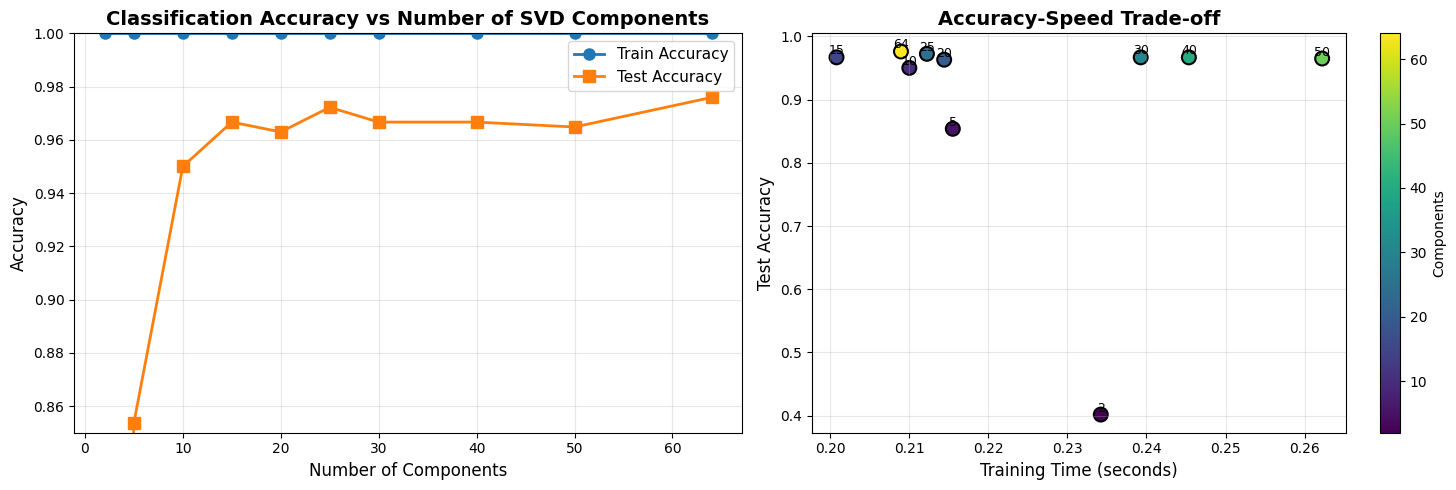

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

# Load data
digits = load_digits()
X, y = digits.data, digits.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Test different numbers of components
component_range = [2, 5, 10, 15, 20, 25, 30, 40, 50, 64]
train_accuracies = []
test_accuracies = []
training_times = []

import time

for n_comp in component_range:
    # Apply SVD
    if n_comp < 64:
        svd = TruncatedSVD(n_components=n_comp, random_state=42)
        X_train_reduced = svd.fit_transform(X_train)
        X_test_reduced = svd.transform(X_test)
    else:
        # Use original features
        X_train_reduced = X_train
        X_test_reduced = X_test

    # Train classifier
    start_time = time.time()
    clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    clf.fit(X_train_reduced, y_train)
    train_time = time.time() - start_time

    # Evaluate
    train_acc = accuracy_score(y_train, clf.predict(X_train_reduced))
    test_acc = accuracy_score(y_test, clf.predict(X_test_reduced))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    training_times.append(train_time)

    print(f"n_components={n_comp:2d}: Train Acc={train_acc:.4f}, "
          f"Test Acc={test_acc:.4f}, Time={train_time:.3f}s")

# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
axes[0].plot(component_range, train_accuracies, 'o-', label='Train Accuracy',
            linewidth=2, markersize=8)
axes[0].plot(component_range, test_accuracies, 's-', label='Test Accuracy',
            linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Components', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Classification Accuracy vs Number of SVD Components',
                 fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)
axes[0].set_ylim([0.85, 1.0])

# Training time vs accuracy trade-off
axes[1].scatter(training_times, test_accuracies, s=100, c=component_range,
               cmap='viridis', edgecolors='black', linewidth=1.5)
for i, n_comp in enumerate(component_range):
    axes[1].annotate(f'{n_comp}', (training_times[i], test_accuracies[i]),
                    fontsize=9, ha='center', va='bottom')
axes[1].set_xlabel('Training Time (seconds)', fontsize=12)
axes[1].set_ylabel('Test Accuracy', fontsize=12)
axes[1].set_title('Accuracy-Speed Trade-off', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)
cbar = plt.colorbar(axes[1].collections[0], ax=axes[1], label='Components')

plt.tight_layout()
plt.show()

# Find optimal number of components
optimal_idx = np.argmax(test_accuracies)
optimal_n = component_range[optimal_idx]
print(f"\n{'='*60}")
print(f"Optimal number of components: {optimal_n}")
print(f"Test accuracy: {test_accuracies[optimal_idx]:.4f}")
print(f"Compression: {64} features → {optimal_n} features ({optimal_n/64*100:.1f}%)")
print(f"Training time: {training_times[optimal_idx]:.3f}s")
print(f"{'='*60}")


## Key Takeaways

Congratulations! You've completed the lesson on Singular Value Decomposition. Here are the main points to remember:

### Core Concepts

1. **SVD Decomposition**: Any matrix $A$ can be decomposed as $A = U \Sigma V^T$, where $U$ and $V$ are orthogonal matrices and $\Sigma$ contains singular values

2. **Singular Values**: The diagonal entries of $\Sigma$ represent the "importance" of each component, ordered from largest to smallest

3. **Low-Rank Approximation**: By keeping only the top $k$ singular values, we can approximate the original matrix while reducing dimensionality

### Practical Applications

4. **Dimensionality Reduction**: SVD effectively reduces high-dimensional data to lower dimensions while preserving important information

5. **Image Compression**: We can compress images by factors of 5-10x while maintaining good visual quality

6. **Noise Reduction**: By truncating small singular values, we can filter noise while preserving signal

7. **Numerical Stability**: SVD is more numerically stable than computing eigenvalues directly, especially for large datasets

### Key Insights

8. **Connection to PCA**: PCA is essentially SVD applied to centered data; the principal components are the right singular vectors

9. **Trade-offs**: There's a balance between compression/speed and accuracy - the optimal number of components depends on your application

10. **Versatility**: SVD works on any matrix (not just square or symmetric), making it extremely versatile

### What You Can Now Do

- Decompose matrices using NumPy's `linalg.svd`
- Apply TruncatedSVD from scikit-learn for efficient dimensionality reduction
- Compress images and reduce noise using SVD
- Choose the optimal number of components for your application
- Understand when to use SVD vs PCA

## Further Resources

To deepen your understanding of Singular Value Decomposition, explore these resources:

### Online Tutorials and Guides

1. **[Machine Learning Mastery - SVD for Machine Learning](https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/)**: Comprehensive tutorial on calculating SVD from scratch and understanding its applications in machine learning

2. **[AskPython - SVD Tutorial](https://www.askpython.com/python/examples/singular-value-decomposition)**: Practical implementation guide using NumPy and scikit-learn

3. **[3Blue1Brown - Essence of Linear Algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)**: Excellent visual introduction to linear algebra concepts including transformations and eigenvalues (Chapter 14 covers eigenvalues)

### Scientific Papers and Books

4. **"Numerical Linear Algebra" by Trefethen and Bau**: Authoritative textbook covering SVD computation and applications (Chapter 4-5)

5. **"Matrix Computations" by Golub and Van Loan**: Classic reference on numerical linear algebra, including comprehensive SVD treatment

### Documentation

6. **[NumPy SVD Documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)**: Official documentation for NumPy's SVD implementation

7. **[scikit-learn TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)**: Documentation for efficient truncated SVD in scikit-learn

### Advanced Topics

8. **Randomized SVD**: For very large matrices, randomized algorithms can compute approximate SVD much faster

9. **Sparse SVD**: Specialized algorithms for sparse matrices (common in text analysis and recommender systems)

10. **Tensor Decompositions**: Extensions of SVD to higher-order tensors (Tucker decomposition, CP decomposition)

### Practice Datasets

- **Olivetti Faces**: Facial recognition (used in this lesson)
- **20 Newsgroups**: Text classification with TF-IDF + SVD (Latent Semantic Analysis)
- **MovieLens**: Recommender systems with collaborative filtering
- **MNIST**: Handwritten digits with higher resolution than the digits dataset

### Next Steps

In the next lesson (Day 44), we'll explore **t-SNE (t-Distributed Stochastic Neighbor Embedding)**, another powerful dimensionality reduction technique particularly useful for visualizing high-dimensional data in 2D or 3D. Unlike SVD/PCA which are linear methods, t-SNE captures non-linear relationships, making it excellent for exploratory data analysis.